In [502]:
cd

/Users/viktorvandervalk


In [503]:
cd Documents/GitHub/DataMiningTechniques/Assignment\ 1

/Users/viktorvandervalk/Documents/GitHub/DataMiningTechniques/Assignment 1


In [504]:
cd patient_data/

/Users/viktorvandervalk/Documents/GitHub/DataMiningTechniques/Assignment 1/patient_data


In [108]:
import pandas as pd
import pickle
from datetime import datetime
import re
from matplotlib import pyplot as plt
import numpy as np
#from sklearn import tree
#from sklearn.ensemble import RandomForestClassifier
import sklearn.ensemble as ske
#import graphviz 
#from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler, scale
import math
#from sklearn.decomposition import PCA
#from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Copy from internet

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

LSTM_opt = np.zeros([6,9])

for n_features in [1]:
    for lag in [3]:

#n_features = 1
#lag = 3
        i = 2
        mses = []

#for i in range(12):  # Walter
#for i in range(12, 23): # Arran
#for i in range(23, 34): # Viktor

    
        squared_error = []
            # load patient data
        try:
            data = pd.read_csv(open('p{:02d}.csv'.format(i),'rb'), index_col=0, parse_dates=True)
        except:
            continue
    
        print('\n --- Patient {:02d} ---'.format(i))
    
        data_reindexed = data.loc[:,data_best_F_mse.loc[i].values]
    
        dataset = data_reindexed.iloc[:,:n_features]
        values = dataset.values
    
        seg = [0.7, 0.1, 0.2]
        t = len(dataset)
        splits = [math.floor(seg[0]*t), math.floor((seg[0]+seg[1])*t)]
    
        ys = values[splits[0]:,0]
        #ys = values[splits[1]:,0]
    
        # ensure all data is float
        values = values.astype('float32')
        # normalize features
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled = scaler.fit_transform(values)
    
        # frame as supervised learning
        reframed = series_to_supervised(scaled, lag, 1)
    
        # split into train and test sets
        values = reframed.values
    
        for tt in range(t-splits[0]-3-math.floor((seg[2]*t))):
        #for tt in range(t-splits[0]-3):
            
            train = values[:splits[0]+tt, :]
            #train = values[:splits[1]+tt, :]
            test = values[splits[0]+tt:splits[0]+math.floor((seg[1]*t)), :]
            #test = values[splits[1]+tt:, :]
            val = values[splits[0]+tt,:]
            #val = values[splits[1]+tt,:]
    
            # split into input and outputs
            n_obs = lag * n_features
            train_X, train_y = train[:, :n_obs], train[:, -n_features]
            test_X, test_y = test[:, :n_obs], test[:, -n_features]
            val_X, val_y = val[:n_obs], val[-n_features]
    
            # reshape input to be 3D [samples, timesteps, features]
            train_X = train_X.reshape((train_X.shape[0], lag, n_features))
            test_X = test_X.reshape((test_X.shape[0], lag, n_features))
            val_X = val_X.reshape((1, lag, n_features))
    
            # design network
            model = Sequential()
            model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
            model.add(Dense(1))
            model.compile(loss='mae', optimizer='adam');
            # fit network
            history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False);
    
            # make a prediction
            yhat = model.predict(val_X)
            val_X = val_X.reshape((val_X.shape[0], lag*n_features))
            # invert scaling for forecast
            inv_yhat = concatenate((yhat, val_X[:, -(n_features-1):]), axis=1)
            inv_yhat = scaler.inverse_transform(inv_yhat)
            inv_yhat = inv_yhat[0][0]
            #inv_yhat = inv_yhat[:,0]
            # invert scaling for actual
            #inv_y = concatenate((val_y, val_X[:, -(n_features-1):]), axis=1)
            #inv_y = scaler.inverse_transform(inv_y)
            inv_y = ys[tt+3]
            #inv_y = inv_y[:,0]
            # calculate RMSE
            print('Predicted:', inv_yhat)
            print('Real:', inv_y)
            squared_error.append((inv_y - inv_yhat)**2)
    
        mse = np.mean(squared_error)
        print('\nMSE: {}'.format(mse))
        #print('Number of validations:', math.floor(t*seg[1]))
        mses.append(mse)
    
    #print('All MSES',mses)
        LSTM_opt[lag, n_features] = np.mean(mses)
        print('\n\nAvg. MSE (all patients): {} \n lag order: {} \n nr of features: {} '.format(np.mean(mses), lag, n_features))


 --- Patient 02 ---
Train on 28 samples, validate on 4 samples
Epoch 1/50


In [737]:
scaler.inverse_transform(reframed)[splits[1]]

array([6.19999958, 6.99999988, 7.40000002, 7.80000017])

In [742]:
ys[7]

7.4

In [714]:
squared_error

[0.6689837942868457,
 0.2555792627717901,
 0.07335728951548921,
 0.07003516112512387,
 0.0017355813324685017]

In [ ]:
[0.6916442122747363,
 0.24850735018867542,
 0.01727503724833733,
 0.01491555360120375,
 3.094264911854621e-06]

In [240]:
val = values[splits[1]:,:]
val_X, val_y = val[:, :n_obs], val[:, -n_features]
val_X = val_X.reshape((val_X.shape[0], n_hours, n_features))
yhat_val = model.predict(val_X)
val_X = val_X.reshape((val_X.shape[0], n_hours*n_features))
# invert scaling for forecast
inv_yhat_val = concatenate((yhat_val, val_X[:, -7:]), axis=1)
inv_yhat_val = scaler.inverse_transform(inv_yhat_val)
inv_yhat_val = inv_yhat_val[:,0]
# invert scaling for actual
val_y = val_y.reshape((len(val_y), 1))
inv_y_val = concatenate((val_y, val_X[:, -7:]), axis=1)
inv_y_val = scaler.inverse_transform(inv_y_val)
inv_y_val = inv_y_val[:,0]

In [699]:
# Good KNN and RF model

KNN_Opt= np.zeros([11,11])
RF_Opt = np.zeros([11,11])


#for i in [1,2,3,5,6,7,8,9,12,13,14,15,16,17,19,20,23,24,25,26,27,28,29,30,31,32,33]:

#for n_features in [9,10]:
#    for lag in [1,2,3,4]:
        
# KNN Best features = 7, lag=1, method = mse, 7 neighbors
msesKNN = []
msesRF = []

n_features = 10
lag = 3
neighbors = 7

# RF Best features = 10, lag = 2, method = mse.

#n_features = 10

for i in [1,2,3,5,6,7,8,9,12,13,14,15,16,17,19,20,23,24,25,26,27,28,29,30,31,32,33]:

    try:
        mood_data = pd.read_csv(open('p{:02d}.csv'.format(i),'rb'), index_col=0, parse_dates=True)
        if lag==1:
            data = pd.read_csv(open('p{:02d}.csv'.format(i),'rb'), index_col=0, parse_dates=True)  
        elif lag==2:
            data = pd.read_csv(open('p{:02d}_k2.csv'.format(i),'rb'), index_col=0, parse_dates=True)
        elif lag==3:
            data = pd.read_csv(open('p{:02d}_k3.csv'.format(i),'rb'), index_col=0, parse_dates=True)
        elif lag==4:
            data = pd.read_csv(open('p{:02d}_k4.csv'.format(i),'rb'), index_col=0, parse_dates=True)
    except:
        continue

    print('\n --- Patient {:02d} ---'.format(i))

    # Get features with highest MSE    
    data_reindexed = data.loc[:,data_best_F_mse.loc[i].values]
    dataset = data_reindexed.iloc[:,:(n_features+1)]

    # Get features with highest correlation
    #data_reindexed = data.loc[:,data_best_F_corr.loc[i].values]
    #dataset = data_reindexed.iloc[:,:(n_features+1)]

    x_p = dataset.values
    y_p = data.loc[:,'next_mood'].values

    # Principal Components Analysis
    #pca = PCA(n_components=10)
    pca_data = scale(x_p, axis=0)
    #x_pca = pca.fit_transform(pca_data)

    x_pca = pca_data

    # Train, test, validation set
    seg = [0.7, 0.1, 0.2]
    t = len(data)
    splits = [math.floor(seg[0]*t), math.floor((seg[0]+seg[1])*t)]

    train_x, train_y = x_pca[:splits[0]], y_p[:splits[0]]
    train2_x, train2_y = x_pca[:splits[1]], y_p[:splits[1]]   # includes validation data


    squared_errorKNN = []
    squared_errorRF = []


    for t in range(len(train2_x), len(y_p)):

    #for t in range(len(train_x), len(train2_x)):

        # KNN
        #knn = KNeighborsRegressor(n_neighbors =n_features-8)
        #knn.fit(train2_x[:t,:], train2_y[:t])
        #yhatKNN = knn.predict(train2_x[t,:].reshape(1,-1))

        # RandomForest
        #clf = ske.RandomForestRegressor(n_estimators=1, max_features=n_features)
        #clf = clf.fit(train2_x[:t,:], train2_y[:t])
        #yhatRF = clf.predict(train2_x[t,:].reshape(1,-1))

        # Final Test
        knn = KNeighborsRegressor(n_neighbors =neighbors)
        knn.fit(x_pca[:t,:], y_p[:t])
        yhatKNN = knn.predict(x_pca[t,:].reshape(1,-1))
        #
        clf = ske.RandomForestRegressor(n_estimators=2000, max_features=10)
        clf = clf.fit(x_pca[:t,:], y_p[:t])
        yhatRF = clf.predict(x_pca[t,:].reshape(1,-1))

        obs = y_p[t]
        #obs = train2_y[t]
        print('Predicted KNN: {:%s}, Predicted RFR: {:%s}, Observed: {:%s}' %(yhatKNN, yhatRF, obs))
        squared_errorKNN.append((obs - yhatKNN)**2)
        squared_errorRF.append((obs - yhatRF)**2)

    mseKNN = np.mean(squared_errorKNN)
    mseRF = np.mean(squared_errorRF)

    print('\nMSE KNN: {}'.format(mseKNN))
    msesKNN.append(mseKNN)

    print('\nMSE RF: {}'.format(mseRF))
    msesRF.append(mseRF)

print('\n\nAvg. MSE KNN (all patients): {}, lag: {}'.format(np.mean(msesKNN), lag))

#KNN_Opt[n_features,lag] = np.mean(msesKNN)

KNN_Final_MSE = np.mean(msesKNN)


print('\n\nAvg. MSE RF (all patients): {}, lag: {}'.format(np.mean(msesRF), lag))

#RF_Opt[n_features, lag] = np.mean(msesRF)

RF_Final_MSE = np.mean(msesRF)



 --- Patient 01 ---
Predicted KNN: {:[7.26428571]}, Predicted RFR: {:[7.2353]}, Observed: {:7.6}
Predicted KNN: {:[7.26428571]}, Predicted RFR: {:[7.3223]}, Observed: {:7.5}
Predicted KNN: {:[7.47857143]}, Predicted RFR: {:[7.25185]}, Observed: {:7.6}
Predicted KNN: {:[7.12142857]}, Predicted RFR: {:[7.311225]}, Observed: {:7.0}
Predicted KNN: {:[7.03571429]}, Predicted RFR: {:[7.02285]}, Observed: {:7.8}
Predicted KNN: {:[7.25]}, Predicted RFR: {:[7.35375]}, Observed: {:8.0}
Predicted KNN: {:[7.49285714]}, Predicted RFR: {:[7.512075]}, Observed: {:7.6}
Predicted KNN: {:[7.57857143]}, Predicted RFR: {:[7.2347]}, Observed: {:8.0}
Predicted KNN: {:[7.60714286]}, Predicted RFR: {:[7.493925]}, Observed: {:8.0}

MSE KNN: 0.18753401360544206

MSE RF: 0.25042008770829555

 --- Patient 02 ---
Predicted KNN: {:[6.86666667]}, Predicted RFR: {:[6.89535]}, Observed: {:6.5}
Predicted KNN: {:[6.72380952]}, Predicted RFR: {:[6.74044167]}, Observed: {:5.666666666666668}
Predicted KNN: {:[6.83333333]}

Predicted KNN: {:[7.1047619]}, Predicted RFR: {:[7.58913333]}, Observed: {:8.0}

MSE KNN: 0.7795731292517011

MSE RF: 1.1680709412778272

 --- Patient 14 ---
Predicted KNN: {:[6.7547619]}, Predicted RFR: {:[6.5081]}, Observed: {:7.5}
Predicted KNN: {:[6.79761905]}, Predicted RFR: {:[6.47494167]}, Observed: {:7.0}
Predicted KNN: {:[7.01904762]}, Predicted RFR: {:[6.61494167]}, Observed: {:7.0}
Predicted KNN: {:[6.94761905]}, Predicted RFR: {:[6.78661667]}, Observed: {:7.0}
Predicted KNN: {:[7.04761905]}, Predicted RFR: {:[7.23106667]}, Observed: {:7.333333333333332}
Predicted KNN: {:[7.23809524]}, Predicted RFR: {:[6.82810833]}, Observed: {:8.0}
Predicted KNN: {:[7.33333333]}, Predicted RFR: {:[7.0494]}, Observed: {:8.0}
Predicted KNN: {:[7.45238095]}, Predicted RFR: {:[7.24861667]}, Observed: {:7.666666666666668}

MSE KNN: 0.2189923469387755

MSE RF: 0.4894436178037851

 --- Patient 15 ---
Predicted KNN: {:[7.02857143]}, Predicted RFR: {:[7.0125]}, Observed: {:7.0}
Predicted KNN: {:[6.

Predicted KNN: {:[7.01428571]}, Predicted RFR: {:[7.201075]}, Observed: {:5.8}
Predicted KNN: {:[6.58571429]}, Predicted RFR: {:[6.5942]}, Observed: {:5.4}
Predicted KNN: {:[7.08571429]}, Predicted RFR: {:[7.1557]}, Observed: {:7.4}
Predicted KNN: {:[7.08571429]}, Predicted RFR: {:[7.53555]}, Observed: {:6.4}

MSE KNN: 0.47224125364431496

MSE RF: 0.622860737946441

 --- Patient 27 ---
Predicted KNN: {:[7.34285714]}, Predicted RFR: {:[7.59185]}, Observed: {:7.8}
Predicted KNN: {:[7.17142857]}, Predicted RFR: {:[7.47564167]}, Observed: {:7.0}
Predicted KNN: {:[7.45714286]}, Predicted RFR: {:[7.43150833]}, Observed: {:6.4}
Predicted KNN: {:[7.42142857]}, Predicted RFR: {:[7.84005833]}, Observed: {:6.6}
Predicted KNN: {:[7.39285714]}, Predicted RFR: {:[7.25283333]}, Observed: {:7.0}
Predicted KNN: {:[7.11428571]}, Predicted RFR: {:[7.52108333]}, Observed: {:7.8}
Predicted KNN: {:[7.51428571]}, Predicted RFR: {:[7.153725]}, Observed: {:6.8}
Predicted KNN: {:[7.13333333]}, Predicted RFR: {:

In [688]:
KNN_Final_MSE

0.4577014932990383

In [700]:
# Calculate Confidence Interval

std_KNN = np.std(msesKNN, ddof=1)
std_RF = np.std(msesRF, ddof=1)
 
       
upper_bound_KNN = KNN_Final_MSE + (2.06*std_KNN/np.sqrt(27))
lower_bound_KNN = KNN_Final_MSE - (2.06*std_KNN/np.sqrt(27))

upper_bound_RF = RF_Final_MSE + (2.06*std_RF/np.sqrt(27))
lower_bound_RF = RF_Final_MSE - (2.06*std_RF/np.sqrt(27))
    
print('KNN: Mean, Std, Lower Bound, Upperbound \n', KNN_Final_MSE, std_KNN, lower_bound_KNN, upper_bound_KNN)
print('RF: Mean, Std, Lower Bound, Upperbound \n', RF_Final_MSE, std_RF, lower_bound_RF, upper_bound_RF) 

KNN: Mean, Std, Lower Bound, Upperbound 
 0.44000260764801974 0.533799050900829 0.22837947664623096 0.6516257386498086
RF: Mean, Std, Lower Bound, Upperbound 
 0.4699835707951887 0.4909000096975989 0.2753676439109077 0.6645994976794698


In [704]:
# Calculate BenchMark predict average over array

mse_BenchMark = []

for i in [1,2,3,5,6,7,8,9,12,13,14,15,16,17,19,20,23,24,25,26,27,28,29,30,31,32,33]:
    
    try:
        mood_data = pd.read_csv(open('p{:02d}.csv'.format(i),'rb'), index_col=0, parse_dates=True)
    except:
            continue

    print('\n --- Patient {:02d} ---'.format(i))

    # Get features with highest MSE    
    x_p = mood_data.loc[:, 'mood'].values
    y_p = mood_data.loc[:,'next_mood'].values

    seg = [0.7, 0.1, 0.2]
    t = len(mood_data)
    splits = [math.floor(seg[0]*t), math.floor((seg[0]+seg[1])*t)]

    squared_er = []
    for step in range(splits[1], t):
        
        x, y = x_p[:step], y_p[step-1]

        squared_er.append((np.mean(x)-y)**2)

    mse = np.mean(squared_er)
    
    print(mse)

    mse_BenchMark.append(mse)

print('BenchMark Total MSE:', np.mean(mse_BenchMark))

std = np.std(mse_BenchMark, ddof=1)
 
       
upper_bound = np.mean(mse_BenchMark) + (2.06*std/np.sqrt(27))
lower_bound = np.mean(mse_BenchMark) - (2.06*std/np.sqrt(27))


    
print('BenchMark: Mean, Std, Lower Bound, Upperbound \n', np.mean(mse_BenchMark), std, lower_bound, upper_bound)
        


 --- Patient 01 ---
0.4400139097276851

 --- Patient 02 ---
1.0135778559663864

 --- Patient 03 ---
0.1451684016769604

 --- Patient 05 ---
0.2566042489436586

 --- Patient 06 ---
0.24501300262047307

 --- Patient 07 ---
1.6119053541589046

 --- Patient 08 ---
0.4830657333528737

 --- Patient 09 ---
0.3795026623701941

 --- Patient 12 ---
0.45337839419630194

 --- Patient 13 ---
0.9016303105702779

 --- Patient 14 ---
0.4055448103648431

 --- Patient 15 ---
0.1408849155953342

 --- Patient 16 ---
0.6268072071044354

 --- Patient 17 ---
0.19001798710418624

 --- Patient 19 ---
0.3354898264333701

 --- Patient 20 ---
0.03759496246247296

 --- Patient 23 ---
0.2525501163808225

 --- Patient 24 ---
0.24917476502184588

 --- Patient 25 ---
0.08353074977358552

 --- Patient 26 ---
0.5301852602083613

 --- Patient 27 ---
0.3324307071662039

 --- Patient 28 ---
0.3558497565995352

 --- Patient 29 ---
0.13751182994907885

 --- Patient 30 ---
0.04409044065844146

 --- Patient 31 ---
0.021587113

In [505]:
# RandomForestRegressor for Feature Importances

StandardScaler()       
best_F_mse = []


for i in [1,2,3,5,6,7,8,9,12,13,14,15,16,17,19,20,23,24,25,26,27,28,29,30,31,32,33]:
#for i in [1,2]:

    if i < 10:
        data = pd.read_csv('p0%s.csv'%i)
        data = data[:math.floor(0.8*len(data))]
        #locals()["x_p0"+str(i)] = data.iloc[:-1,2:]
        #locals()["y_p0"+str(i)] = data.iloc[1:,1]
        
    else:
        data = pd.read_csv('p%s.csv'%i)
        data = data[:math.floor(0.8*len(data))]
        
    
    x_labels = np.array(data.columns[3:])
    x_p = data.iloc[:,3:]
    y_p = data.iloc[:,1]
    clf = ske.RandomForestRegressor(n_estimators=2000, max_features=len(x_p.iloc[0,:]))
    clf = clf.fit(x_p, y_p)
    
    fet_ind = np.argsort(clf.feature_importances_)[::-1]
    fet_imp = clf.feature_importances_[fet_ind]
    labels = x_labels[fet_ind]
    best_F_mse.append(labels[:9])
    


In [506]:
data_best_F_mse = pd.DataFrame(data=best_F_mse, columns=range(1,10),index=[1,2,3,5,6,7,8,9,12,13,14,15,16,17,19,20,23,24,25,26,27,28,29,30,31,32,33])

In [507]:
value = np.array(['mood','mood','mood','mood','mood','mood','mood','mood','mood','mood','mood','mood','mood','mood','mood','mood','mood','mood','mood','mood','mood','mood','mood','mood','mood','mood','mood'])
data_best_F_mse.insert(0, 0, value)

In [509]:
data_best_F_mse.to_csv('Best_F_MSE')

In [593]:
data_best_F_corr = pd.read_csv('Best_F_Corr.csv',  index_col=0, usecols=range(1,12))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  

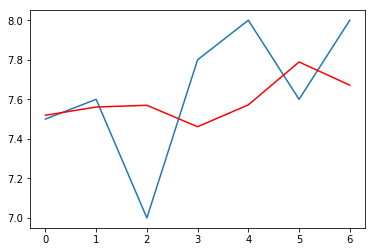

In [83]:
# Arima model, possible benchmark?
trainData = data1[0][:39].values
testData = data1[0][39:46].values

history = [x for x in trainData]
predictions = list()

for t in range(len(testData)):
    model = ARIMA(history, order=(2,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = testData[t]
    history.append(obs)
    
plt.plot(testData)
plt.plot(predictions, color='red')
plt.show()

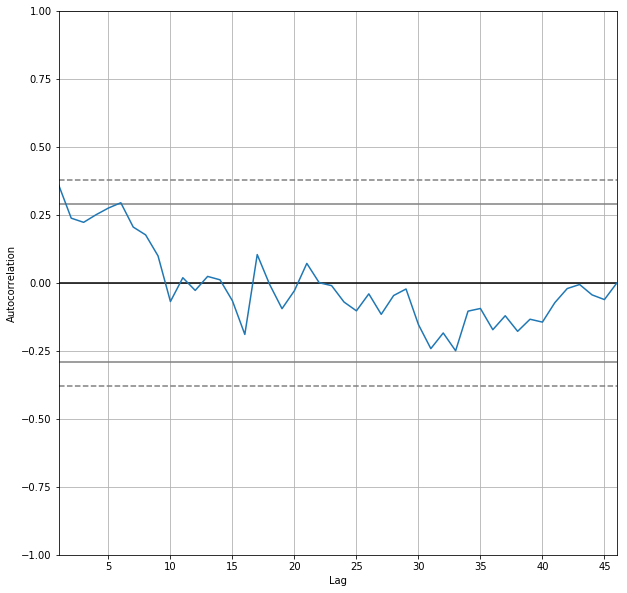

In [62]:
# Autocorrelation
moodp1 = data3[0][:46]
plt.figure(figsize=[10,10])
autocorrelation_plot(moodp1)